Carga de liberías y datos

In [129]:
#Importación de librerías
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor


In [130]:
# Cargar datos de entrenamiento, prueba y sample 
df_train = pd.read_csv('C:/Users/edamv/ml_exam_intento1_16112024/house-prices-advanced-regression-techniques/train.csv') 
df_test = pd.read_csv('C:/Users/edamv/ml_exam_intento1_16112024/house-prices-advanced-regression-techniques/test.csv') 
sample_submission = pd.read_csv('C:/Users/edamv/ml_exam_intento1_16112024/house-prices-advanced-regression-techniques/sample_submission.csv') 
# Mostrar información básica 
print(f"train_test: {df_train.head()}") 
print(f"test_test: {df_test.head()}") 
print(f"sample: {sample_submission.head()}")

train_test:    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

1. Limpieza de Datos:

1.1. Identificación y eliminación de valores duplicados

In [131]:
# Verificar datos nulos df_train
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
...,...,...,...
MoSold,1460,0,0.00
YrSold,1460,0,0.00
SaleType,1460,0,0.00
SaleCondition,1460,0,0.00


In [132]:
# Verificar datos nulos df_test
qsna=df_test.shape[0]-df_test.isnull().sum(axis=0)
qna=df_test.isnull().sum(axis=0)
ppna=round(100*(df_test.isnull().sum(axis=0)/df_test.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
PoolQC,3,1456,99.79
MiscFeature,51,1408,96.50
Alley,107,1352,92.67
Fence,290,1169,80.12
MasVnrType,565,894,61.27
...,...,...,...
EnclosedPorch,1459,0,0.00
MiscVal,1459,0,0.00
MoSold,1459,0,0.00
YrSold,1459,0,0.00


In [133]:
# Verificar datos nulos sample
qsna=sample_submission.shape[0]-sample_submission.isnull().sum(axis=0)
qna=sample_submission.isnull().sum(axis=0)
ppna=round(100*(sample_submission.isnull().sum(axis=0)/sample_submission.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Id,1459,0,0.0
SalePrice,1459,0,0.0


In [134]:
# Identificación y eliminación de valores duplicados: Identificar y eliminar duplicados 

# Identificar duplicados df_train
df_train.duplicated() 
print(f"Duplicados df_train:{df_train.duplicated()}")

#Identificar duplicados df_test
df_test.duplicated() 
print(f"Duplicados df_test:{df_test.duplicated()}")

#Identificar duplicados df_test
sample_submission.duplicated() 
print(f"Duplicados sample_submission:{sample_submission.duplicated()}")

#No  se encuentra ningún duplicado por lo que no se utilizará código para eliminarlos.
#df_train.drop_duplicates(inplace=True)
#df_test.drop_duplicates(inplace=True)
#sample_submission.drop_duplicates(inplace=True)


Duplicados df_train:0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool
Duplicados df_test:0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 1459, dtype: bool
Duplicados sample_submission:0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 1459, dtype: bool


1.2. Verificación y ajuste de tipos de datos

In [135]:
# Verificar tipos de datos df_train
print(f"Tipo de datos de df_train: {df_train.dtypes}") 


Tipo de datos de df_train: Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [136]:
# Verificar tipos de datos df_test
print(f"Tipo de datos de df_test: {df_test.dtypes}") 


Tipo de datos de df_test: Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


In [137]:
#Verificar tipos de datos sample_submission
print(f"Tipo de datos de sample_submission: {sample_submission.dtypes}") 

Tipo de datos de sample_submission: Id             int64
SalePrice    float64
dtype: object


1.3. Corrección de inconsistencias en valores categóricos (sólo df_train)

In [138]:
#Ajustar tipos de datos según sea necesario 

#df_train

# Seleccionar automáticamente las columnas categóricas 
categorical_columns = df_train.select_dtypes(include=['object']).columns 
# Aplicar la unificación a cada columna categórica 
for col in categorical_columns: 
    df_train[col] = df_train[col].str.strip().str.lower() 
# Verificar los cambios 
print(df_train)

#df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')
# 3. Corrección de inconsistencias en valores categóricos: Revisar y unificar categorías
#df_train['MSZoning'] = df_train['MSZoning'].str.strip().str.lower()

# Definir columnas numéricas y categóricas num_features = df_train.select_dtypes(include=['int64', 'float64']).columns cat_features = df_train.select_dtypes(include=['object'

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       rl         65.0     8450   pave   NaN      reg   
1        2          20       rl         80.0     9600   pave   NaN      reg   
2        3          60       rl         68.0    11250   pave   NaN      ir1   
3        4          70       rl         60.0     9550   pave   NaN      ir1   
4        5          60       rl         84.0    14260   pave   NaN      ir1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       rl         62.0     7917   pave   NaN      reg   
1456  1457          20       rl         85.0    13175   pave   NaN      reg   
1457  1458          70       rl         66.0     9042   pave   NaN      reg   
1458  1459          20       rl         68.0     9717   pave   NaN      reg   
1459  1460          20       rl         75.0     9937   pave   NaN      reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [139]:
# Función para convertir valores específicos a booleanos 

#df_train

def convert_to_boolean(df_train, columns): 
    for col in columns: 
        unique_values = df_train[col].dropna().unique() 
        if set(unique_values) == {'Y', 'N'}: 
            df[col] = df_train[col].map({'Y': True, 'N': False}) 
        elif set(unique_values) == {1, 0}: 
            df_train[col] = df_train[col].astype(bool) 
    return df_train 
# Identificar columnas categóricas categorical_columns = df_train.select_dtypes(include=['object']).columns 
# Aplicar la unificación a cada columna categórica for col in categorical_columns: df_train[col] = df_train[col].str.strip().str.lower() 

# Identificar columnas con valores que pueden ser booleanos 
bool_columns = df_train.select_dtypes(include=['object', 'int64']).columns 

# Convertir a booleano 
df_train = convert_to_boolean(df_train, bool_columns) 

# Verificar los cambios 
print(df_train.dtypes)

df_train



Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,rl,62.0,7917,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,NaN,reg,lvl,allpub,...,0,NaN,mnprv,NaN,0,2,2010,wd,normal,210000
1457,1458,70,rl,66.0,9042,pave,NaN,reg,lvl,allpub,...,0,NaN,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,4,2010,wd,normal,142125


In [140]:
# Limpieza de cadenas
import re

def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra, pero mantiene los caracteres internos.
    3. Elimina paréntesis y su contenido al final de la cadena.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar paréntesis y su contenido al final de la cadena
        cadena = re.sub(r'\s*\([^)]*\)\s*$', '', cadena)
        
        # 3. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
    
        return cadena
    
    return cadena

In [141]:
# Verificación de datos anómalos 
# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna_total in dataframe.columns:
        valores_unicos = dataframe[columna_total].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna_total}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 5 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print("-" * 40)

# Uso de la función con tu DataFrame
verificar_contenido_columnas(df_train)

Columna: Id
Ejemplos de valores: [ 1  2  3  4  5  6  7  8  9 10]
Cantidad de valores únicos: 1460
----------------------------------------
Columna: MSSubClass
Ejemplos de valores: [ 60  20  70  50 190  45  90 120  30  85]
Cantidad de valores únicos: 15
----------------------------------------
Columna: MSZoning
Ejemplos de valores: ['rl' 'rm' 'c (all)' 'fv' 'rh']
Cantidad de valores únicos: 5
----------------------------------------
Columna: LotFrontage
Ejemplos de valores: [65. 80. 68. 60. 84. 85. 75. nan 51. 50.]
Cantidad de valores únicos: 111
----------------------------------------
Columna: LotArea
Ejemplos de valores: [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]
Cantidad de valores únicos: 1073
----------------------------------------
Columna: Street
Ejemplos de valores: ['pave' 'grvl']
Cantidad de valores únicos: 2
----------------------------------------
Columna: Alley
Ejemplos de valores: [nan 'grvl' 'pave']
Cantidad de valores únicos: 3
-----------------------

In [142]:
1.4. Manejo de valores faltantes adecuadamente

SyntaxError: invalid syntax (2822226396.py, line 1)

In [ ]:
#Visualizar estadísticas para identificar valores faltantes 

df_train.describe().T
#Se puede ver que las columnas LotFrontage, MasVnrArea y GarageYrBlt no alcanzan los 1460 valores


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
# Verificar datos nulos df_train
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).T
#Se puede observar que las columnas PoolQC, MiscFeature y Alley cuentan con más de 90% de valores nulos 

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageQual,GarageFinish,GarageType,...,OpenPorchSF,WoodDeckSF,PoolArea,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
datos sin NAs en q,7.00,54.0,91.00,281.00,588.00,770.00,1201.00,1379.00,1379.00,1379.00,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
Na en q,1453.00,1406.0,1369.00,1179.00,872.00,690.00,259.00,81.00,81.00,81.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Na en %,99.52,96.3,93.77,80.75,59.73,47.26,17.74,5.55,5.55,5.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Identificar todas las columnas con valores faltantes
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
#Identificar todos los tipo de columnas
df_train.info() 
#LotFrontage 1201, Alley 91, MasVnrType 588, MasVnrArea 1452, BsmtQual 1423 BsmtCond 1423, BsmtExposure 1422, BsmtFinType1 1423, BsmtFinType2 1422, Electrical 1459, 
#FireplaceQu 770, GarageType 1379, GarageYrBlt 1379 GarageFinish 1379, GarageQual 1379, GarageCond 1379, PoolQC 7, Fence 281, MiscFeature 54

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Eliminar columnas con más del 80% de valores nulos (Alley 91, MiscFeature 54, PoolQC 7, Fence 281)
df_train.drop(['PoolQC', 'MiscFeature', 'Alley','Fence'],axis=1,inplace=True)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,reg,lvl,allpub,inside,...,0,0,0,0,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,reg,lvl,allpub,fr2,...,0,0,0,0,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,ir1,lvl,allpub,inside,...,0,0,0,0,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,ir1,lvl,allpub,corner,...,272,0,0,0,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,ir1,lvl,allpub,fr2,...,0,0,0,0,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,rl,62.0,7917,pave,reg,lvl,allpub,inside,...,0,0,0,0,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,reg,lvl,allpub,inside,...,0,0,0,0,0,2,2010,wd,normal,210000
1457,1458,70,rl,66.0,9042,pave,reg,lvl,allpub,inside,...,0,0,0,0,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,reg,lvl,allpub,inside,...,112,0,0,0,0,4,2010,wd,normal,142125


In [ ]:
#Revisar columnas con valores faltantes menores al 80%
df_train[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

#LotFrontage 1201, MasVnrType 588, MasVnrArea 1452, BsmtQual 1423 BsmtCond 1423, BsmtExposure 1422, BsmtFinType1 1423, BsmtFinType2 1422, Electrical 1459, 
#FireplaceQu 770, GarageType 1379, GarageYrBlt 1379 GarageFinish 1379, GarageQual 1379, GarageCond 1379


,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,brkface,196.0,gd,ta,no,glq,unf,sbrkr,NaN,attchd,2003.0,rfn,ta,ta
1,80.0,NaN,0.0,gd,ta,gd,alq,unf,sbrkr,ta,attchd,1976.0,rfn,ta,ta
2,68.0,brkface,162.0,gd,ta,mn,glq,unf,sbrkr,ta,attchd,2001.0,rfn,ta,ta
3,60.0,NaN,0.0,ta,gd,no,alq,unf,sbrkr,gd,detchd,1998.0,unf,ta,ta
4,84.0,brkface,350.0,gd,ta,av,glq,unf,sbrkr,ta,attchd,2000.0,rfn,ta,ta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,0.0,gd,ta,no,unf,unf,sbrkr,ta,attchd,1999.0,rfn,ta,ta
1456,85.0,stone,119.0,gd,ta,no,alq,rec,sbrkr,ta,attchd,1978.0,unf,ta,ta
1457,66.0,NaN,0.0,ta,gd,no,glq,unf,sbrkr,gd,attchd,1941.0,rfn,ta,ta
1458,68.0,NaN,0.0,ta,ta,mn,glq,rec,fusea,NaN,attchd,1950.0,unf,ta,ta


In [ ]:
# Imputar datos faltantes con la media, moda, o un valor constante adecuado
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode(), inplace=True)
#LotFrontage 1201, MasVnrType 588, MasVnrArea 1452, BsmtQual 1423 BsmtCond 1423, BsmtExposure 1422, BsmtFinType1 1423, BsmtFinType2 1422, Electrical 1459, 
#FireplaceQu 770, GarageType 1379, GarageYrBlt 1379 GarageFinish 1379, GarageQual 1379, GarageCond 1379


C:\Users\edamv\AppData\Local\Temp\ipykernel_13356\1083989708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
C:\Users\edamv\AppData\Local\Temp\ipykernel_13356\1083989708.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

2. Exploración de datos

Visualizaciones univariadas

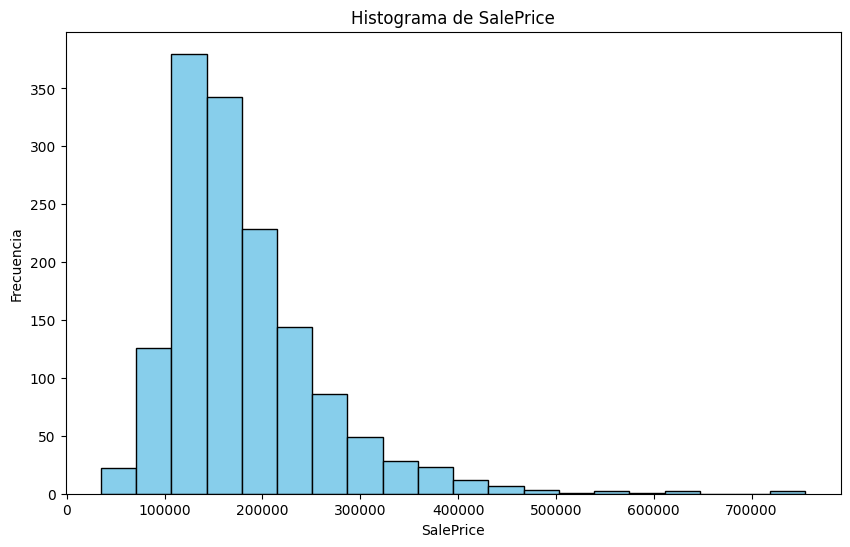

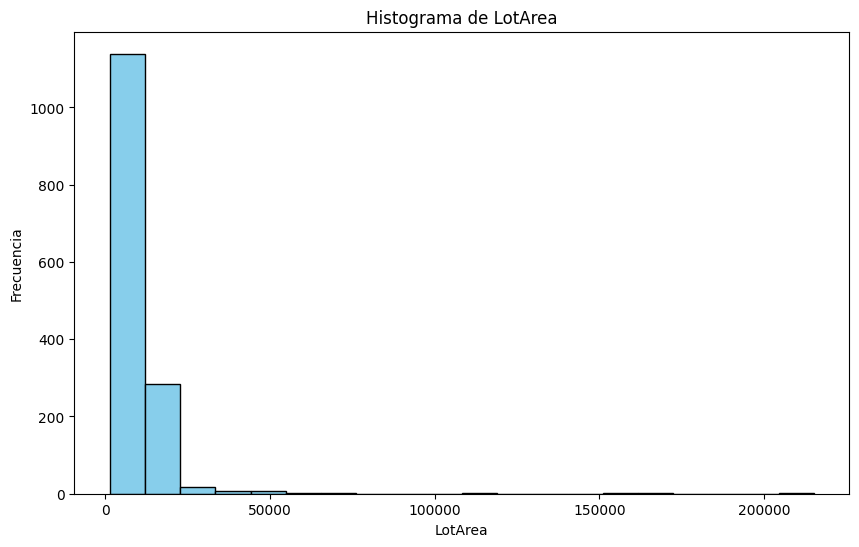

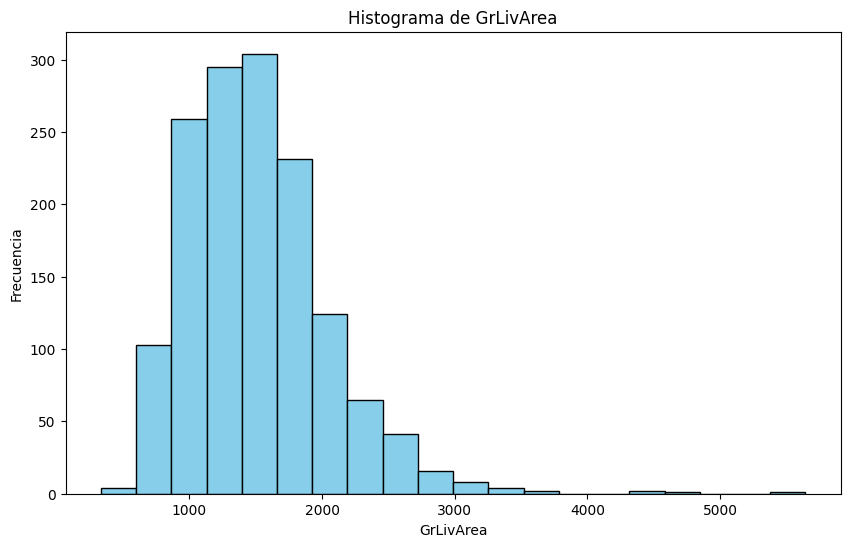

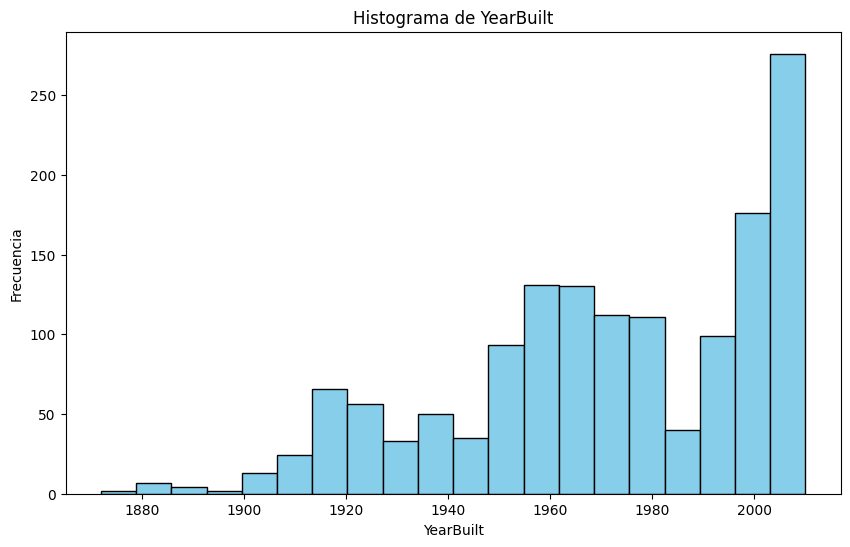

In [ ]:
# Histogramas           #Univariada    
variables = ['SalePrice', 'LotArea', 'GrLivArea', 'YearBuilt'] 
for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(df_train[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()
#En SalePrice los precios normalmente están entre 100000 y 200000. LotArea es más frecuente entre 0 a 50000. GrLiv

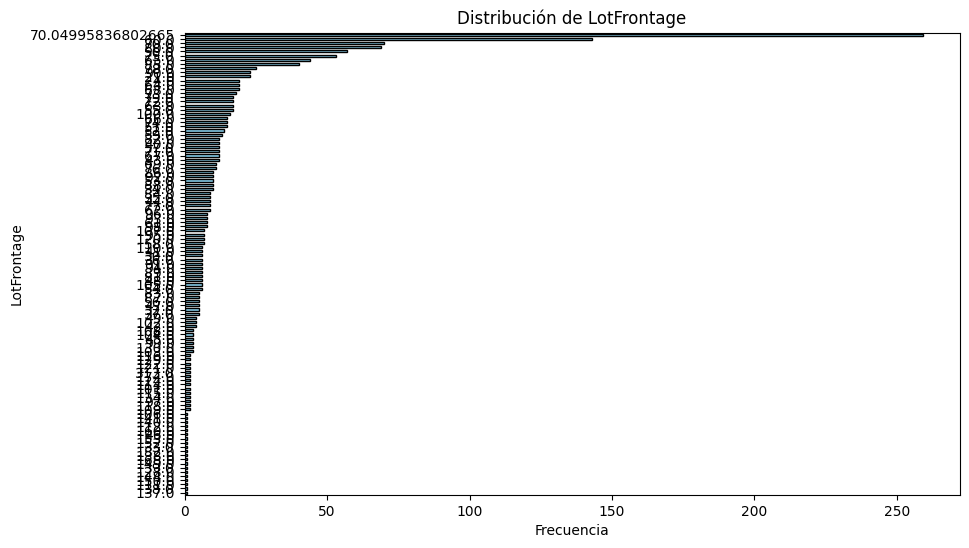

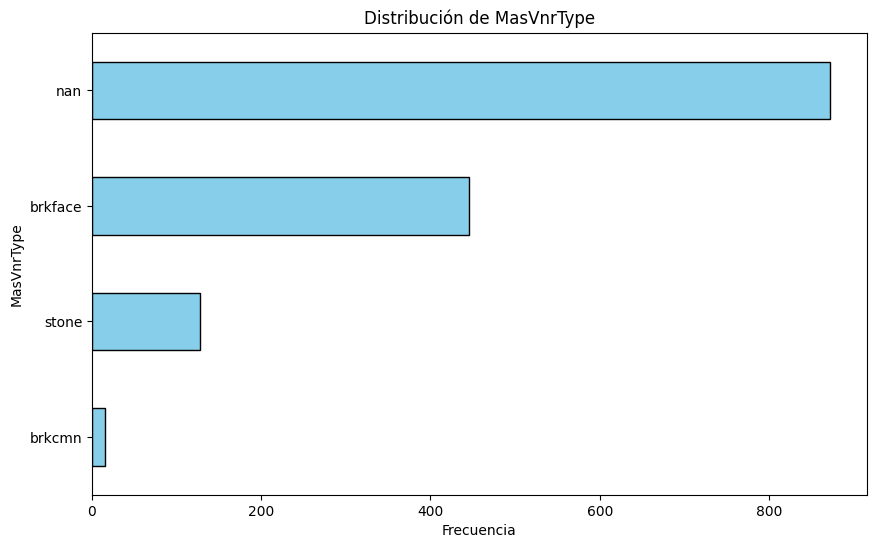

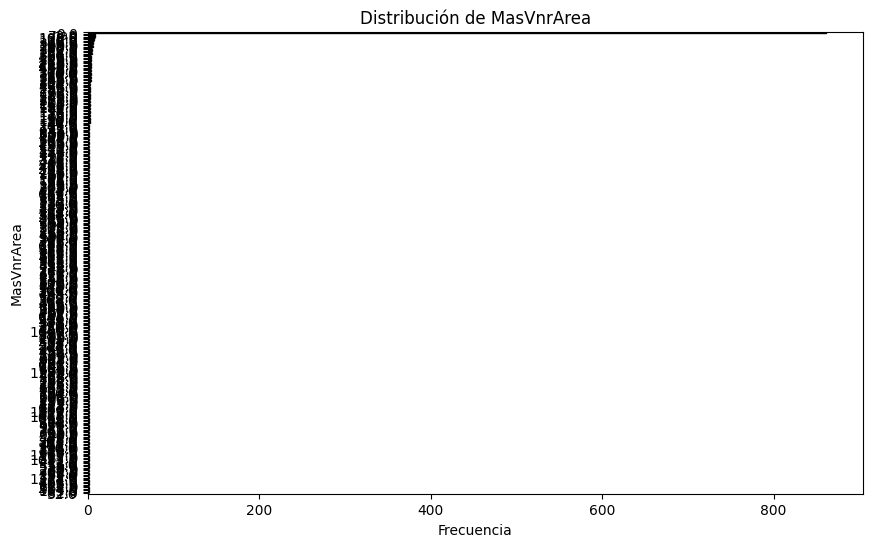

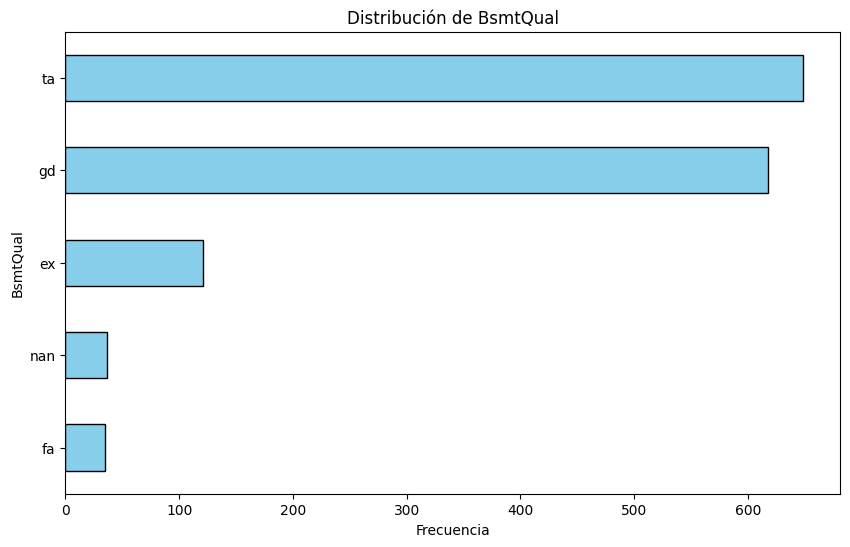

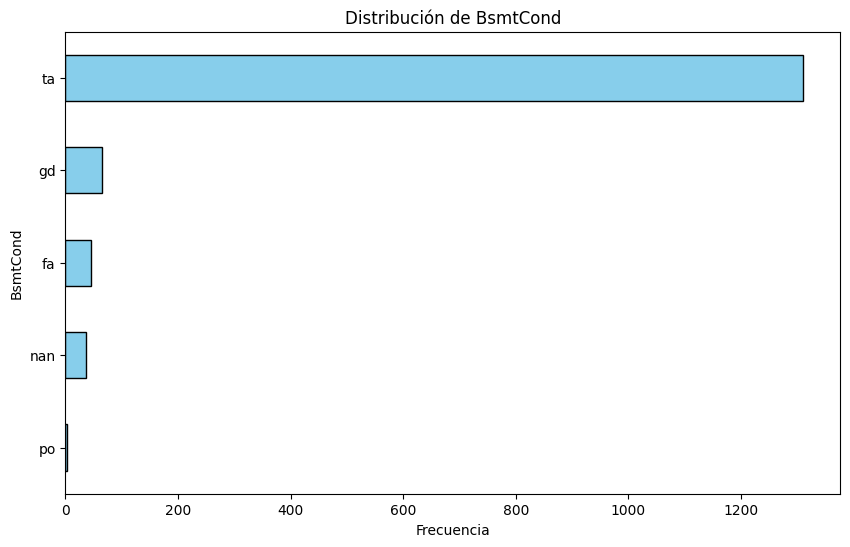

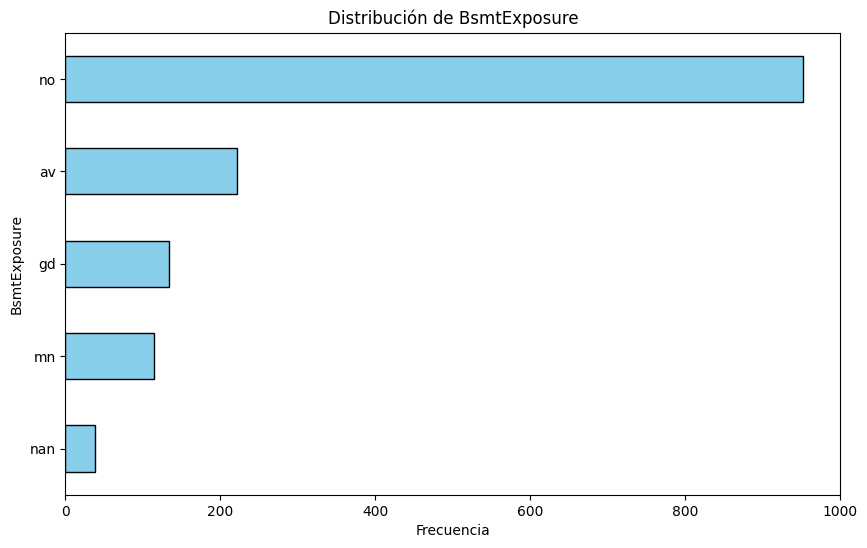

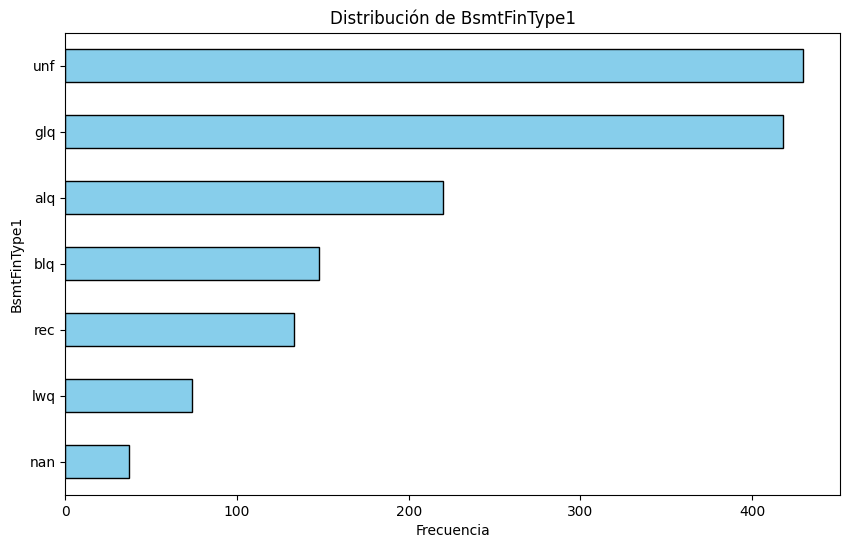

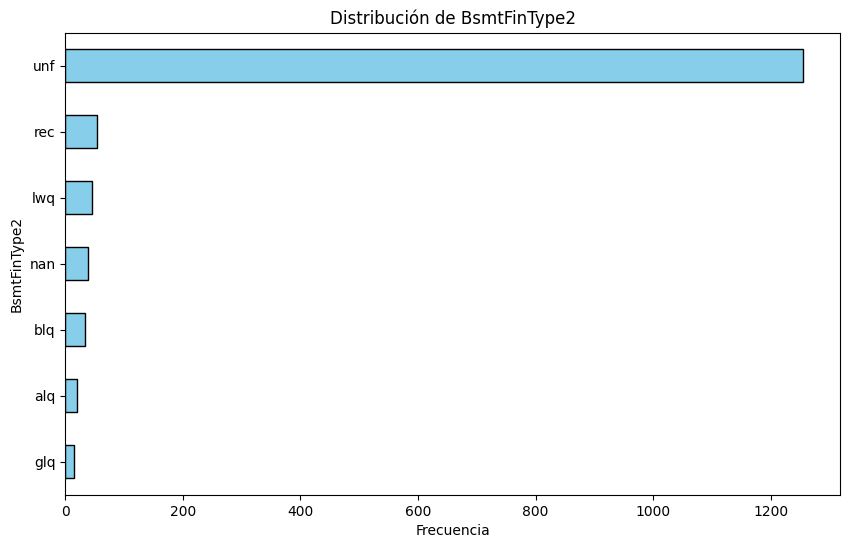

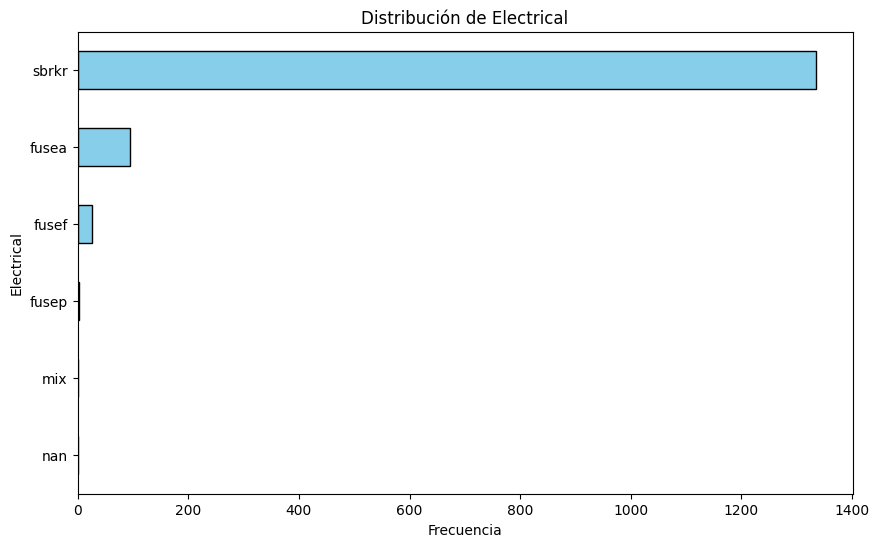

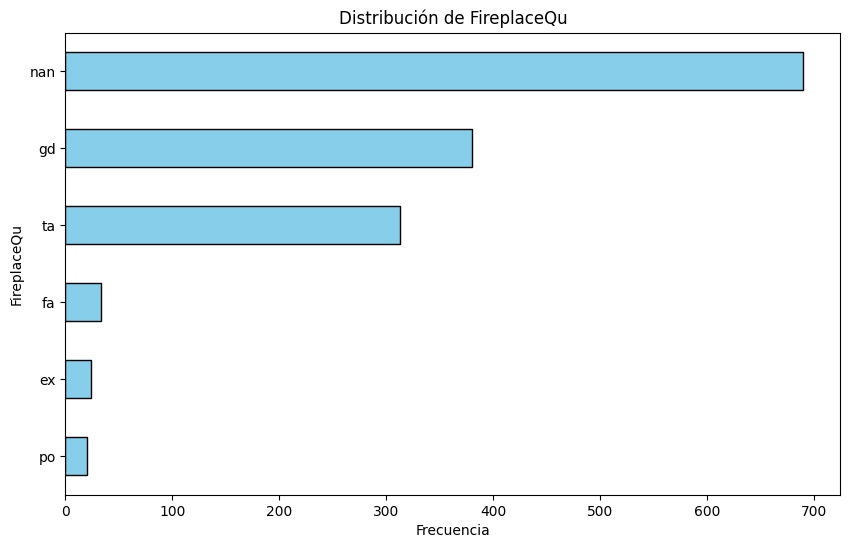

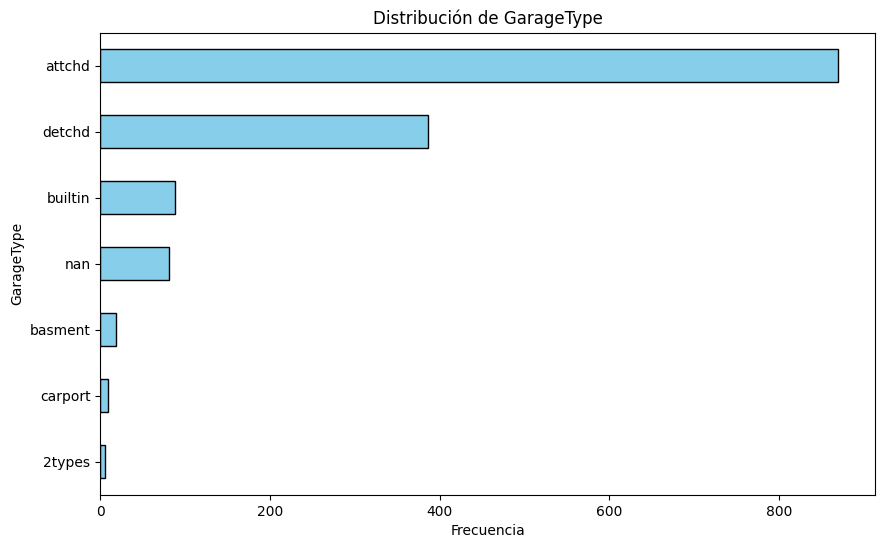

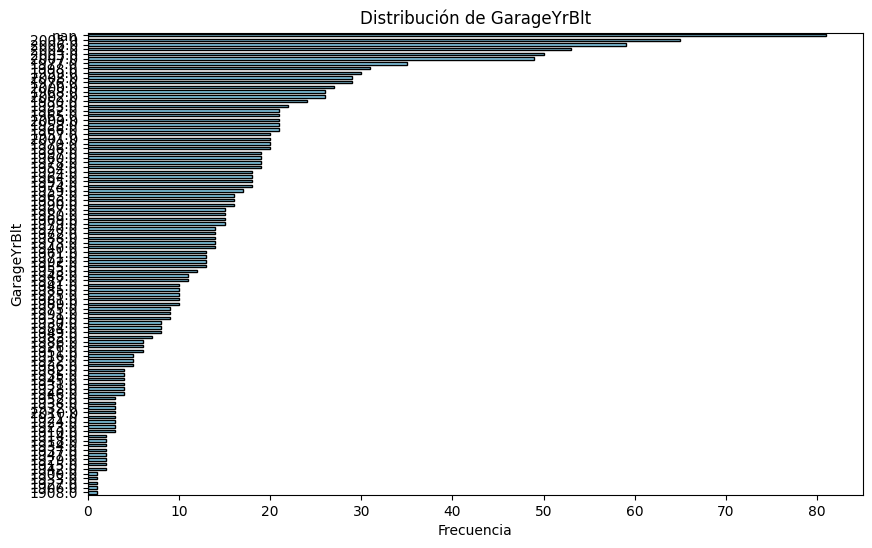

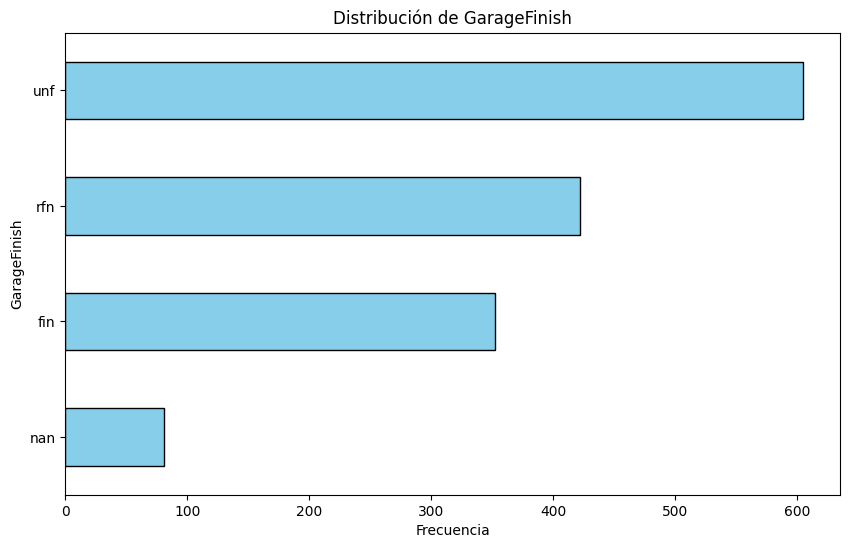

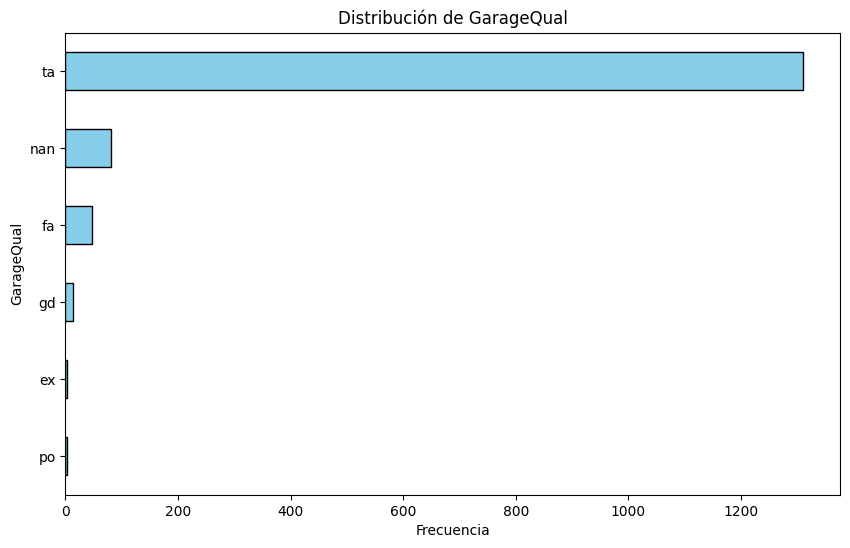

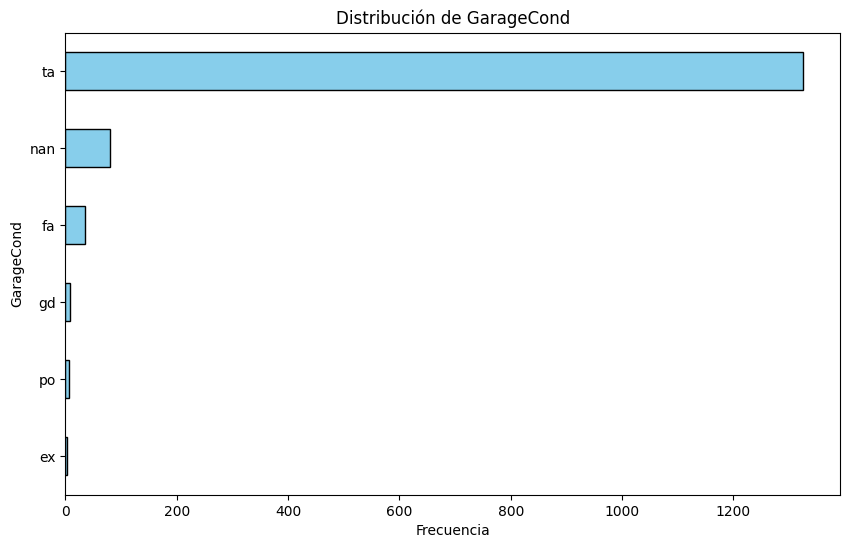

In [ ]:
# Gráfico de barras horizontales

# Ordenar valores en orden ascendente
variables_barrash = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
    
# Crear el gráfico de barras horizontales para cada variable 
for va in variables_barrash: 
    plt.figure(figsize=(10, 6)) 
    df_train[va].value_counts(dropna=False).sort_values(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black') 
    plt.xlabel('Frecuencia') 
    plt.ylabel(va) 
    plt.title(f'Distribución de {va}') 
    plt.show()


#Puede verse que en las variables MasVnrType y FireplaceQu los valores de na son mayores que sus otros campos con valores. 
# Los gráficos de las variables LotFrontage, MasVnrArea y GarageYrBlt no pueden visualizarse correctamente debido a que a diferencia de las otras variables seleccionadas, estas poseen muchos valores y muy pocos nulos.

Visualizaciones Multivariadas

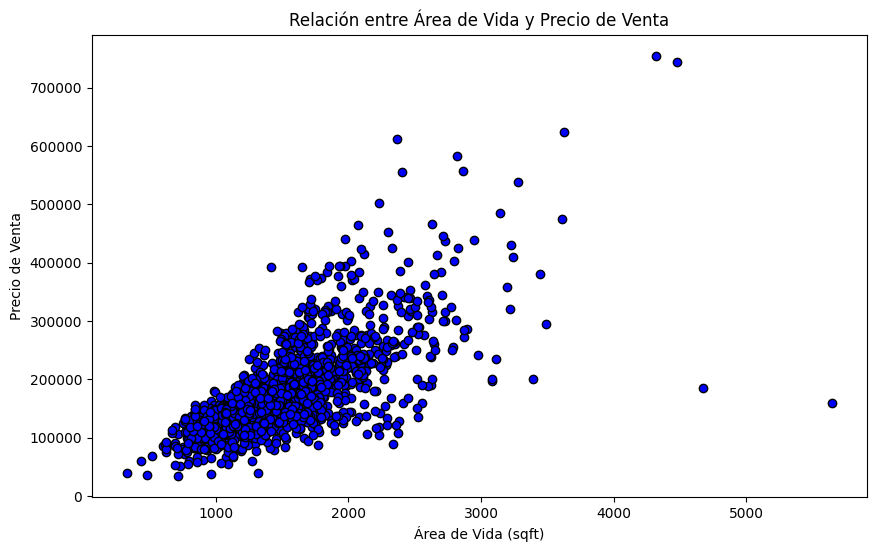

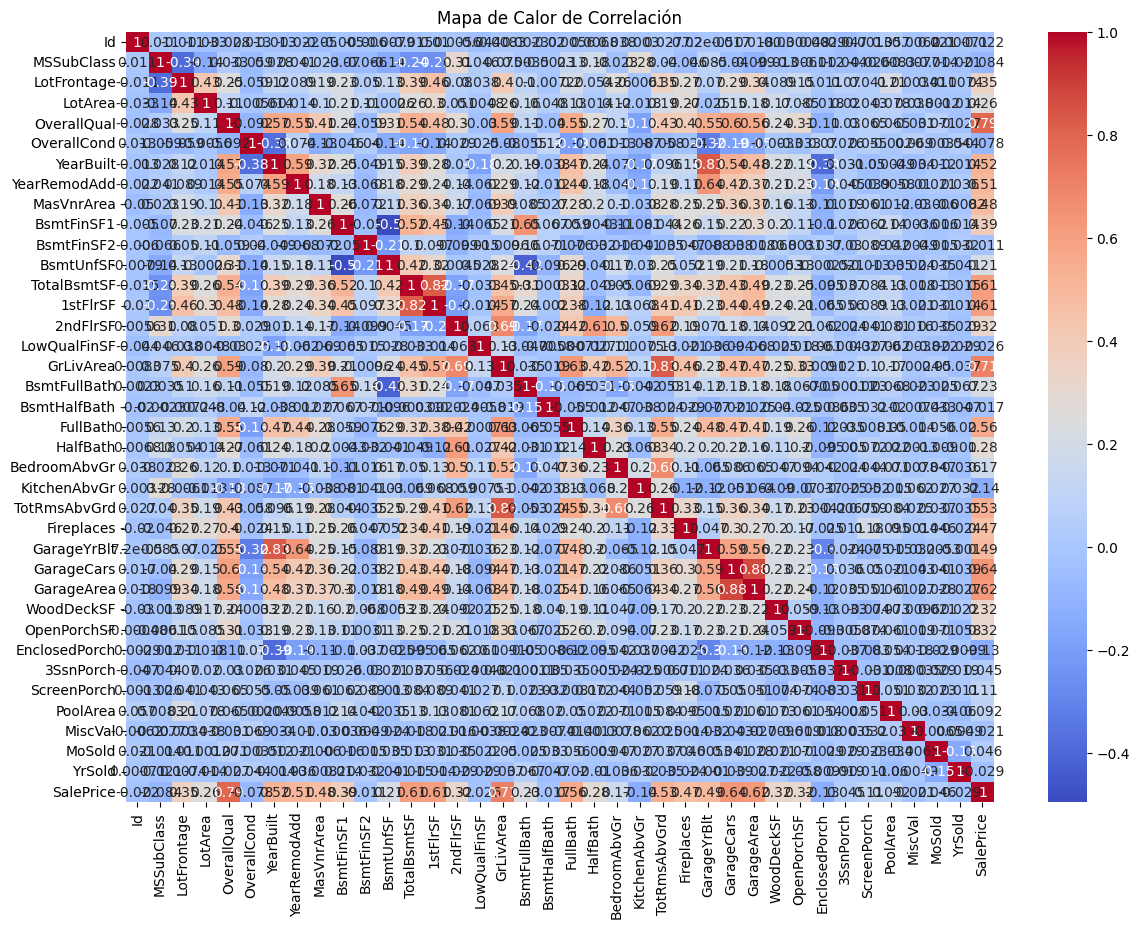

In [ ]:

# Diagramas de dispersión       
plt.figure(figsize=(10, 6))
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'], color='blue', edgecolor='black')
plt.title('Relación entre Área de Vida y Precio de Venta')
plt.xlabel('Área de Vida (sqft)')
plt.ylabel('Precio de Venta')
plt.show()

# Mapas de calor           
# Identificar columnas numéricas 
numeric_columns = df_train.select_dtypes(include=['number']).columns 
# Crear un DataFrame solo con columnas numéricas 
df_numeric = df_train[numeric_columns] 
# Generar el mapa de calor 
plt.figure(figsize=(14, 10)) 
corr = df_numeric.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Mapa de Calor de Correlación')
plt.show()


3. Implementación de Modelos

Regresión Lineal

In [152]:
#import pandas as pd
#import numpy as np
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split

# Cargar datos de entrenamiento y prueba
#df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

# Separar características y target
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocesar Características Numéricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns

imputer_num = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_num = imputer_num.fit_transform(X_train[num_features])
X_val_num = imputer_num.transform(X_val[num_features])
X_train_num = scaler.fit_transform(X_train_num)
X_val_num = scaler.transform(X_val_num)

# Preprocesar Características Categóricas
cat_features = X_train.select_dtypes(include=['object']).columns

imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat = imputer_cat.fit_transform(X_train[cat_features])
X_val_cat = imputer_cat.transform(X_val[cat_features])
X_train_cat = encoder.fit_transform(X_train_cat)
X_val_cat = encoder.transform(X_val_cat)

# Asegurarse de que las matrices son bidimensionales
X_train_cat = np.array(X_train_cat)
X_val_cat = np.array(X_val_cat)

# Combinar características numéricas y categóricas
X_train_preprocessed = np.hstack((X_train_num, X_train_cat))
X_val_preprocessed = np.hstack((X_val_num, X_val_cat))

# Entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

# Predecir y evaluar
y_pred_lr = lr.predict(X_val_preprocessed)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_val, y_pred_lr))
print('RMSE:', mean_squared_error(y_val, y_pred_lr, squared=False))
print('R^2:', r2_score(y_val, y_pred_lr))

# Preprocesar el conjunto de prueba
X_test_num = imputer_num.transform(df_test[num_features])
X_test_cat = imputer_cat.transform(df_test[cat_features])
X_test_num = scaler.transform(X_test_num)
X_test_cat = encoder.transform(X_test_cat)

# Asegurarse de que las matrices son bidimensionales
X_test_cat = np.array(X_test_cat)

X_test_preprocessed = np.hstack((X_test_num, X_test_cat))

# Usar regresión lineal para predecir
y_test_pred = lr.predict(X_test_preprocessed)

# Crear archivo de envío
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)


Linear Regression:
MSE: 2.8535542662263854e+26
RMSE: 16892466564200.697
R^2: -3.7202515110147384e+16


c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KNN

In [151]:
#import pandas as pd
#import numpy as np

# Cargar datos de entrenamiento y prueba
#df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

# Separar características y target
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

# Dividir en conjunto de entrenamiento y prueba
#from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocesar Características Numéricas
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Imputar valores faltantes y estandarizar
imputer_num = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_num = imputer_num.fit_transform(X_train[num_features])
X_val_num = imputer_num.transform(X_val[num_features])
X_train_num = scaler.fit_transform(X_train_num)
X_val_num = scaler.transform(X_val_num)

# Preprocesar Características Categóricas
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder

# Seleccionar columnas categóricas
cat_features = X_train.select_dtypes(include=['object']).columns

# Imputar valores faltantes y codificar en one-hot
imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat = imputer_cat.fit_transform(X_train[cat_features])
X_val_cat = imputer_cat.transform(X_val[cat_features])
X_train_cat = encoder.fit_transform(X_train_cat)
X_val_cat = encoder.transform(X_val_cat)

# Asegurarse de que las matrices son bidimensionales
X_train_cat = np.array(X_train_cat)
X_val_cat = np.array(X_val_cat)

# Combinar características numéricas y categóricas
X_train_preprocessed = np.hstack((X_train_num, X_train_cat))
X_val_preprocessed = np.hstack((X_val_num, X_val_cat))

# Entrenar el modelo KNN
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.metrics import mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar n_neighbors según sea necesario
knn.fit(X_train_preprocessed, y_train)

# Predecir y evaluar
y_pred_knn = knn.predict(X_val_preprocessed)
print('KNN:')
print('MSE:', mean_squared_error(y_val, y_pred_knn))
print('RMSE:', mean_squared_error(y_val, y_pred_knn, squared=False))
print('R^2:', r2_score(y_val, y_pred_knn))

# Preprocesar el conjunto de prueba
X_test_num = imputer_num.transform(df_test[num_features])
X_test_cat = imputer_cat.transform(df_test[cat_features])
X_test_num = scaler.transform(X_test_num)
X_test_cat = encoder.transform(X_test_cat)

# Asegurarse de que las matrices son bidimensionales
X_test_cat = np.array(X_test_cat)

X_test_preprocessed = np.hstack((X_test_num, X_test_cat))

# Usar KNN para predecir
y_test_pred = knn.predict(X_test_preprocessed)

# Crear archivo de envío
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)


KNN:
MSE: 1506615367.3161645
RMSE: 38815.143530794325
R^2: 0.8035787101330241


c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Comparación
Linear Regression:
MSE: 2.853, RMSE: 16892466564200.697, R2: -3.720
Los valores de evaluación sugieren que el modelo de regresión lineal no está funcionando bien para estos datos. El valor de R^2 negativo y el RMSE desproporcionadamente alto son indicativos de problemas potenciales en la implementación o en la naturaleza de los datos que no son lineales.
KNN: 
MSE:1506615367.316, RMSE: 38815.143, R2: 0.804
Presenta mejores resultados en términos de ajuste del modelo y precisión, con un MSE y RMSE razonables y un buen R^2 de 0.804. Esto sugiere que KNN es un modelo más adecuado para este conjunto de datos en comparación con la regresión lineal.

En resumen, el modelo de K-Nearest Neighbors (KNN) es claramente superior al modelo de Linear Regression para este dataset, según las métricas de evaluación proporcionadas.
